In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Convolution2D, MaxPooling2D, Flatten, Lambda, Cropping2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import cv2

import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

import time
import pickle

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [10]:
def load_center_data(data_dir):
    # load the data
    X_train = []
    y_train = []

    with open(data_dir + "driving_log.csv") as csv_file:
        reader = csv.reader(csv_file)
        count = 0
        for line in reader:
            if count == 20:
                break
            count += 1
            path_to_image = "." + line[0][line[0].find("/data/"):]
            print(path_to_image)
            X_train.append(cv2.imread(path_to_image)) # center image
#             X_train.append(cv2.imread(line[0])) # center image
            y_train.append(float(line[3]))  # steering angels 
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train, y_train

In [16]:
# data_dir = "./data/track1/20170304/"
t = time.time()
X_train, y_train = load_center_data("./data/")
print("Time: " + str(time.time() - t)) 


./data/track1/20170304/IMG/center_2017_03_04_12_00_01_182.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_01_299.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_01_426.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_01_528.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_01_649.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_01_788.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_01_930.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_035.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_149.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_263.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_379.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_488.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_617.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_723.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_826.jpg
./data/track1/20170304/IMG/center_2017_03_04_12_00_02_977.jpg
./data/t

In [17]:
X_train.shape

(20, 160, 320, 3)

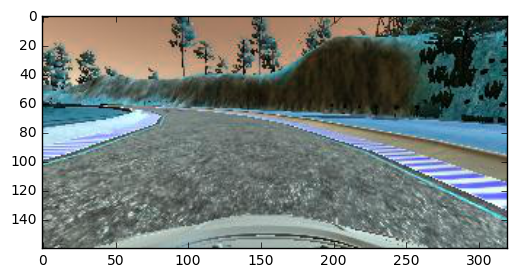

In [18]:
plt.imshow(X_train[0])

In [75]:
def load_3_camera_data(data_dir, correction_steer=0.2):
    # load the data
    # TODO: use generator, how much memory required???
#     data_dir = "./data/track1/20170304/"
#     t = time.time()
    X_train = []
    y_train = []

    with open(data_dir + "driving_log.csv") as csv_file:
        reader = csv.reader(csv_file)
#         count = 0
        for line in reader:
#             if count == 10:
#                 break
#             count += 1
            steer_center = float(line[3])
            X_train.extend([cv2.imread(line[i].strip()) for i in range(3) ]) # center, left, right'\
            y_train.extend([steer_center, steer_center + correction_steer, steer_center - correction_steer])
    return np.array(X_train), np.array(y_train)

In [74]:
X_train.shape

(30, 160, 320, 3)

In [67]:
X_train[1].shape

(160, 320, 3)

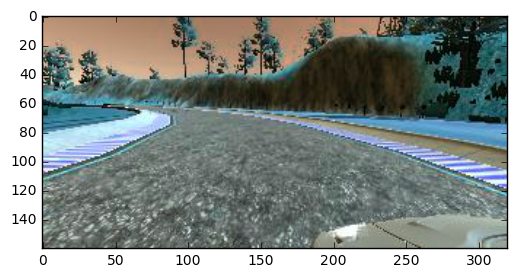

In [68]:
plt.imshow(X_train[1])

In [28]:
model = Sequential()
model.add(Lambda(lambda x : x/255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((70, 25), (0, 0))))
model.add(Convolution2D(6, 5, 5, border_mode="valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 5, 5, border_mode="valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120))
# model.add(Activation("relu"))

model.add(Dense(84))
# model.add(Activation("relu"))

model.add(Dense(1))
# model.add(Activation("softmax"))

# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = SGD(lr=0.001)
model.compile(loss='mse', optimizer="adam")
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5, batch_size=120)
model.save("model-lenet.h5")


Train on 2677 samples, validate on 670 samples
Epoch 1/5
2677/2677 [==============================] - 77s - loss: 18.2171 - val_loss: 0.3771
Epoch 2/5


KeyboardInterrupt: 

In [14]:
# build the model

model = Sequential()
model.add(Lambda(lambda x : x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss="mse", optimizer="adam")
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=10, callbacks=[early_stopping])
model.save("model.h5")

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 8s - loss: 10.0669 - val_loss: 0.9585
Epoch 2/10
1600/1600 [==============================] - 5s - loss: 2.1819 - val_loss: 1.1985
Epoch 3/10
1600/1600 [==============================] - 5s - loss: 0.9231 - val_loss: 0.6219
Epoch 4/10
1600/1600 [==============================] - 6s - loss: 1.0859 - val_loss: 0.5281
Epoch 5/10
1600/1600 [==============================] - 6s - loss: 1.1395 - val_loss: 2.2876
Epoch 6/10
1600/1600 [==============================] - 5s - loss: 1.8426 - val_loss: 1.0135
Epoch 7/10
1600/1600 [==============================] - 5s - loss: 1.2017 - val_loss: 0.4872
Epoch 8/10
1600/1600 [==============================] - 5s - loss: 1.6273 - val_loss: 1.6809
Epoch 9/10
1600/1600 [==============================] - 5s - loss: 2.4382 - val_loss: 2.1647
Epoch 10/10
1600/1600 [==============================] - 6s - loss: 5.5575 - val_loss: 4.9473


In [11]:
model = Sequential()
model.add(Lambda(lambda x : x/255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Convolution2D(6, 5, 5, border_mode="valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 5, 5, border_mode="valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120))
# model.add(Activation("relu"))

model.add(Dense(84))
# model.add(Activation("relu"))

model.add(Dense(1))
# model.add(Activation("softmax"))

# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = SGD(lr=0.001)
model.compile(loss='mse', optimizer="adam")
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5, batch_size=120)
model.save("model-lenet.h5")


Train on 2677 samples, validate on 670 samples
Epoch 1/5
2677/2677 [==============================] - 378s - loss: 196.6639 - val_loss: 5.9650
Epoch 2/5
2677/2677 [==============================] - 353s - loss: 1.1585 - val_loss: 0.0563
Epoch 3/5
2677/2677 [==============================] - 362s - loss: 0.0639 - val_loss: 0.0726
Epoch 4/5
2677/2677 [==============================] - 431s - loss: 0.0665 - val_loss: 0.0660
Epoch 5/5
2677/2677 [==============================] - 261s - loss: 0.0595 - val_loss: 0.0596


### using the generators and crop the images

In [27]:
# def data_generator(data_dir, batch_size=32):
    
#     samples = []
#     with open(data_dir + "driving_log.csv") as csv_file:
#         reader = csv.reader(csv_file)
#         for line in reader:
#             samples.append(line)
    
#     sample_train, sample_validation = train_test_split(samples, test_size = 0.2)
    
# #     while True:
# #     shuffle(sample_train)
#     shuffle(samples)
#     for offset in range(0, len(sample_train), batch_size):
#         X_train = []
#         y_train = []
#         for line in sample_train[offset:offset+batch_size]:
# #             X_train.append(cv2.imread("./data/track1/20170304/IMG/" + line[0].split("/")[-1]))
#             X_train.append("./data/track1/20170304/IMG/" + line[0].split("/")[-1])
    
#         yield np.array(X_train)

# train = data_generator("./data/track1/20170304/", batch_size=1000)
# batch = next(train)
# while len(batch) > 0:
#     print(len(batch))
#     batch = next(train)
# #     for i in next(train):
# #         print(i)

In [2]:
# samples = []
# data_dir = './data/track1/20170304/'
# with open(data_dir + 'driving_log.csv') as csvfile:
#     reader = csv.reader(csvfile)
#     for line in reader:
#         samples.append(line)

# train_samples, validation_samples = train_test_split(samples, test_size=0.2)

# def generator(samples, batch_size=32):
#     num_samples = len(samples)
#     while 1: # Loop forever so the generator never terminates
#         shuffle(samples)
#         for offset in range(0, num_samples, batch_size):
#             batch_samples = samples[offset:offset+batch_size]

#             images = []
#             angles = []
#             for batch_sample in batch_samples:
#                 name = data_dir + './IMG/'+batch_sample[0].split('/')[-1]
#                 center_image = cv2.imread(name)
#                 center_angle = float(batch_sample[3])
#                 images.append(center_image)
#                 angles.append(center_angle)

#             # trim image to only see section with road
#             X_train = np.array(images)
#             y_train = np.array(angles)
#             yield sklearn.utils.shuffle(X_train, y_train)

In [3]:
# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
# validation_generator = generator(validation_samples, batch_size=32)

In [42]:
for X_train in next(train_generator):
    len(X_train)